In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Spandan Computational Physics Assignment 3

### Coupon Collector Problem

In [2]:
#THE FIRST STEP IS TO DEFINE A FUNCTION THAT COMPARES TWO ARRAYS AND SAYS IF THEY ARE EQUAL
def areEqual(arr1, arr2, N, M):
 
    # If lengths of array are not
    # equal means array are not equal
    if (N != M): #FIRST PARAMETER IS TO CHECK LENGTH 
        return 0
 
    # Sort both arrays SO THAT IT IS UNIFORMLY COMPARABLE
    arr1.sort()
    arr2.sort()
 
    # Linearly compare elements
    for i in range(0, N):
        if (arr1[i] != arr2[i]):
            return 0 
 
    # If all elements were same.
    return 1

In [3]:
# THE NEXT STEP IS TO DEFINE A FUNCTION THAT WILL GIVE THE NUMBER OF CARDS PICKED 
# NOTE THAT THIS IS DONE BY THE CASE THAT NO CARDS ARE REPLACED AFTER REMOVING IT 

def count():
    want=np.array([1.,2.,3.,4.]) # THIS IS WHAT WE WANT: ONE OF EACH SUIT
    deck=[1., 1., 1., 1., 1.,1., 1., 1., 1., 1., 1., 1., 1.,2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.]
    # CREATE A DECK WITH 52 CARDS, 13 OF THEM OF THE SAME SUIT 
    a=[] # A BLANK LIST TO APPEND THE PICKED CARDS FROM THE DECK
    ctr=0 # COUNTER=0 FOR NUMBER OF CARDS 
    condition= 0 #CONDITION FOR THE STATEMENT TO BE TRUE INITIALLY 0 (1 WOULD BE TRUE )
    while condition == 0 and ctr<52: # RUN THE LOOP UNTIL SATISFIED
        ctr+=1 #PICK A CARD
        r=np.random.randint(len(deck)) #RANDOM PICK FROM ANY CARD IN THE DECK 
        a.append(deck.pop(r)) #REMOVE THIS ELEMENT FROM THE DECK AND ADD IT TO A
        condition=areEqual(want,np.unique(np.sort(a)),len(want),len(np.unique(a))) 
        # NOW WE CHECK WHETHER THEY ARE EQUAL OR NOT
        # THE NP.UNIQUE GIVES ONLY UNIQUE ELEMENTS- THIS IS DONE SO THAT OUR ARRAY IS EQUAL TO THE WANTED ARRAY
        
    return ctr #GIVES THE NUMBER

In [4]:
trials=10_0000 #NO. OF TIMES 
data=np.zeros(trials) #EMPTY ARRAY TO STORE DATA
for i in range(trials):
    data[i]=count() # RUN THE COUNT FUNCTION FOR EACH TRIAL 

#CALCULATING THE REQUIRED QUANTITIES
print('The average number of cards to pick are '+str(np.round(np.mean(data),3)))
print('The standard deviation for the set is '+str(np.round(np.std(data),3)))

The average number of cards to pick are 7.651
The standard deviation for the set is 3.031


### 2D Random walk

In [5]:
def N_steps(N,L):
    # First Create an initial Lattice centered at L
    x = np.arange(0, 2*L+1, dtype=int)
    y = np.arange(0, 2*L+1, dtype=int)
    X, Y = np.meshgrid(x, y) #creates a lattice
    #Now we will assume that the walker is at the center of the grid
    #The center of this grid is not 0 but L 
    # The arange function does not include the +1 that is why the center is L
    #x_0,y_0=L,L
    #Now we define another array to store the number of times we return to any coordinate
    Z = np.zeros((2*L+1, 2*L+1))
    x_0,y_0=L,L #Center at 0,0
    for i in range(N):    
            r = np.random.rand()
            if r < 0.25:    #Move in direction 1
                y_0 += 1
            elif r < 0.5:   #Move in direction 2
                y_0 -= 1   
            elif r < 0.75:  #Move in direction 3
                x_0 += 1
            else:           #Move in direction 4
                x_0 -= 1
            Z[x_0,y_0] += 1
            
    return (x_0,y_0),Z #Returns endpoint and the counts of repititions


def simulate(N,L,trials):
    z= np.zeros((2*L+1, 2*L+1)) #initial lattice of zero points
    for i in range(trials):
        Z_run = np.zeros((2*L +1, 2*L + 1)) # get counts of each point for one run
        coords,Z_run = N_steps(N,L) # update this value using our function
        z += Z_run #add it to the total counts outside
    p=z/(N*trials) #the total times probability was seen was for N and trials
    return p #gives probability

Text(0.5, 0, 'Probability')

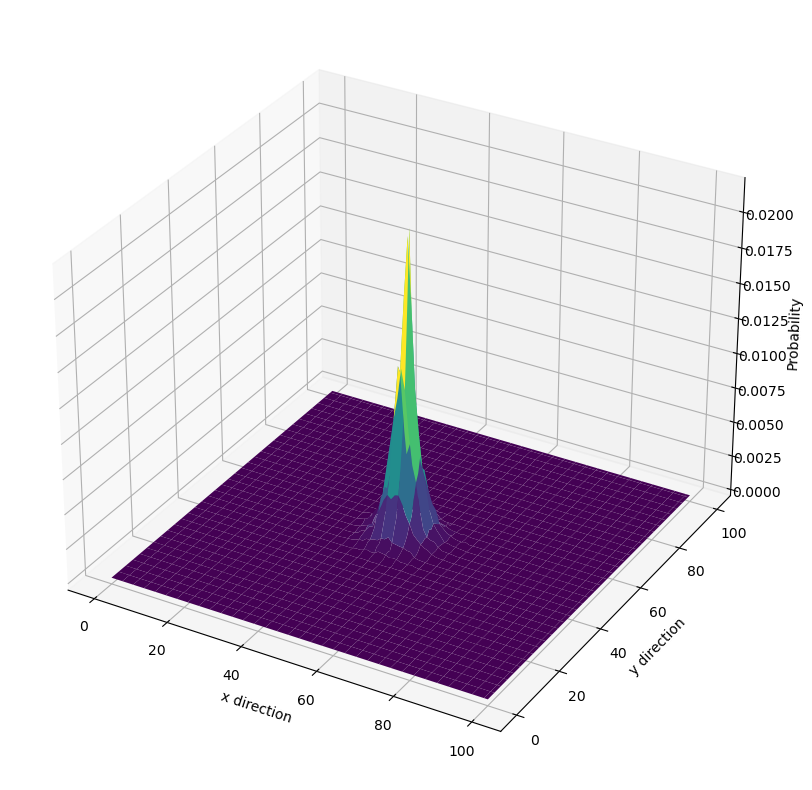

In [6]:
N=50 # assuming equal case
L=50
trials=10_00 #take 1000 trials
x = np.arange(0, 2*L+1, dtype=int) #you need integers as labels on lattice
y = np.arange(0, 2*L+1, dtype=int)
X, Y = np.meshgrid(x, y) #creates a lattice
Z=simulate(N,L,trials) #simulate function to give probability
#PLOTTING TAKEN FROM DOCUMENTATION 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(10, 10)
ax.plot_surface(X, Y, Z, cmap='viridis');
ax.set_xlabel('x direction')
ax.set_ylabel('y direction')
ax.set_zlabel('Probability')

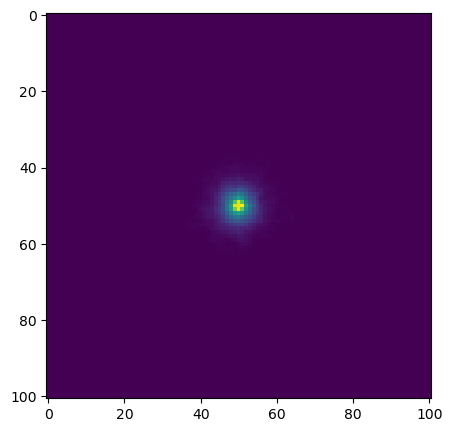

In [7]:
#Seeing from another angle as a heat map
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.imshow(Z, cmap='viridis');

#### Note: 
As one can see from the graphs above, the probability distribution is a gaussian that peaks at the origin of the walker which in our case is L,L since that simplified the lattice structure. The peak becomes more prominant when the number of iterations or steps taken increase. 

In [8]:
##CALCULATING ROOT MEAN SQUARE DISPLACEMENT: 
#NOTE: ONE WALK GIVES A HIGHLY FLUCTUATING RANDOM FUNCTION
#HENCE WE MUST LOOK AT THE AVERAGE OVER TRIALS OF THE SIMULATION FOR A GIVEN STEP 
# THIS IS THE SAME AS MULTIPLE WALKERS TAKING THE SAME STEP. 
L=25
trials=10_00
N_vals=np.arange(1,25,1)
displacement=np.zeros(len(N_vals))
for i in range(len(displacement)):
    r=np.zeros(trials)
    for j in range(trials):
        x,y= N_steps(N_vals[i],L)[0][0],N_steps(N_vals[i],L)[0][1]
        r[j]=(x-L)**2 + (y-L)**2
    displacement[i] = np.mean(r)

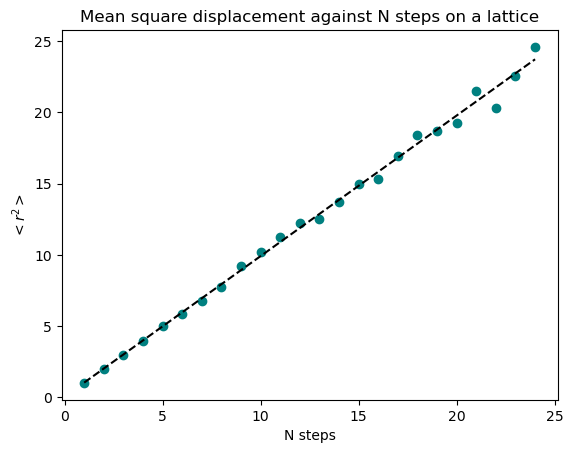

In [9]:
plt.scatter(N_vals,displacement,c='teal')
plt.xlabel('N steps')
plt.ylabel(r'$< r^2 >$')
m,c=np.polyfit(N_vals,displacement,1)
plt.plot(N_vals,N_vals*m+c,c='k',ls='--')
plt.title('Mean square displacement against N steps on a lattice')
plt.show()

#### Note:
When we averaged over these multoiple trials, we get a linear relationship between the parameters. 

### Rumour Spreading

In [10]:
def heard(N): #Defining how many people hear a rumour given a group of N guests
    guests=np.arange(0,N,1) #call each guest a number label
    heard=[0] #Jack knows by default what is happening
    pheard=0 #number of people who heard it is 0 
    true_condition=0
    while true_condition==0: #while this condition is false
            r=np.random.randint(1,N) # choose a guest 
            pheard+=1 #tell them a rumour 
            if r!=heard[-1]: #if the guest has NOT been told the rumour by the previous person:
                heard.append(r) #add them to the list of guests who know 
                if len(set(heard))!=len(heard): #If the unique elements are not equal to the number of people
                    #this means there has been a repition and someone has heard a rumour a second time
                    #they will no longer spread the rumour, ending the loop
                    true_condition+=1 #hence it stops the loop
                    heard.pop(-1) #since we counted them one more time, we need to remove them from the list 

    return len(heard) #this gives the number of people who heard the rumour

In [11]:
## Doing the experiment for a group of 20 people
N=int(input('Decide the number of people in your group'))
trials=10_00_000
sim=np.zeros(trials)
for i in range(trials):
    sim[i]=heard(N)

Decide the number of people in your group21


In [12]:
vals,counts=np.unique(sim,return_counts=True) #This gives how many times a particular outcome occurs
Probabilities=counts/trials

In [13]:
for i in range(len(vals)):
    person=vals[i]
    prob=Probabilities[i]
    print('The probability of rumour spreading among '+str(person)+' people is '+str(np.round(prob,6))+' from '+str(N)+' people')

The probability of rumour spreading among 3.0 people is 0.05231 from 21 people
The probability of rumour spreading among 4.0 people is 0.099633 from 21 people
The probability of rumour spreading among 5.0 people is 0.13371 from 21 people
The probability of rumour spreading among 6.0 people is 0.150387 from 21 people
The probability of rumour spreading among 7.0 people is 0.148533 from 21 people
The probability of rumour spreading among 8.0 people is 0.131572 from 21 people
The probability of rumour spreading among 9.0 people is 0.10491 from 21 people
The probability of rumour spreading among 10.0 people is 0.075289 from 21 people
The probability of rumour spreading among 11.0 people is 0.049298 from 21 people
The probability of rumour spreading among 12.0 people is 0.028653 from 21 people
The probability of rumour spreading among 13.0 people is 0.014783 from 21 people
The probability of rumour spreading among 14.0 people is 0.006904 from 21 people
The probability of rumour spreading am

In [14]:
print('The expected number of people that hear the rumour in a group of '+str(N)+' people is '+str(np.round(np.mean(sim),3)))

The expected number of people that hear the rumour in a group of 21 people is 7.153


### N dimensional hypersphere

In [15]:
#Defining a general function for an N dimensional volume
def general_unit_volume(dim, iterations): #takes dimensions and the number of montecarlo sweeps required
    count_in_sphere = 0 #number of points inside the generalised space 

    for points in range(iterations): #number of iterations
        dim_arr=np.zeros(dim) #stores the value of the random values in x y z whatever dimensions
        for i in range(dim):
            dim_arr[i]=2*np.random.uniform()-1 #creates N-dimension random numbers and stores it 

        distance=np.sqrt(np.sum(dim_arr**2))# calculates the general form of the radius 
        if distance < 1.0: # if the point is in circle 
            count_in_sphere += 1 #then add to it 

    return np.power(2.0, dim) * (count_in_sphere / iterations) 
           # the ratio multiplied by the area of a 2L square (hence L=1 leaves us with 2^N)

In [16]:
# Using this function for different dimensions
dimensions=np.arange(2,15,1)
V_d=np.zeros(len(dimensions))
for i in range(len(dimensions)):
    V_d[i]=general_unit_volume(dimensions[i], 10_00_000)

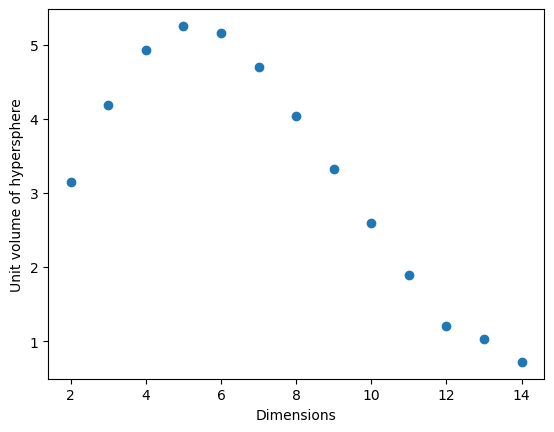

In [17]:
#Plotting this
plt.scatter(dimensions,V_d)
plt.xlabel('Dimensions')
plt.ylabel('Unit volume of hypersphere');
plt.show()

#### Using the General formula for 4th order interpolation

$$
p_4(x)=y_1 \frac{\left(x-x_2\right)\left(x-x_3\right)\left(x-x_4\right)}{\left(x_1-x_2\right)\left(x_1-x_3\right)\left(x_1-x_4\right)}+y_2 \frac{\left(x-x_1\right)\left(x-x_3\right)\left(x-x_4\right)}{\left(x_2-x_1\right)\left(x_2-x_3\right)\left(x_2-x_4\right)} \\
\quad+y_3 \frac{\left(x-x_1\right)\left(x-x_2\right)\left(x-x_4\right)}{\left(x_3-x_1\right)\left(x_3-x_2\right)\left(x_3-x_4\right)}+y_4 \frac{\left(x-x_1\right)\left(x-x_2\right)\left(x-x_3\right)}{\left(x_4-x_1\right)\left(x_4-x_2\right)\left(x_4-x_3\right)} .
$$

In [18]:
x1,x2,x3,x4=4,5,6,7
y1,y2,y3,y4=V_d[2],V_d[3],V_d[4],V_d[5]
def P_4(x):
    fraction_1=((x-x2)*(x-x3)*(x-x4))/((x1-x2)*(x1-x3)*(x1-x4))
    fraction_2=((x-x1)*(x-x3)*(x-x4))/((x2-x1)*(x2-x3)*(x2-x4))
    fraction_3=((x-x1)*(x-x2)*(x-x4))/((x3-x1)*(x3-x2)*(x3-x4))
    fraction_4=((x-x1)*(x-x2)*(x-x3))/((x4-x1)*(x4-x2)*(x4-x3))
    return y1*fraction_1+y2*fraction_2+y3*fraction_3+y4*fraction_4

In [19]:
print('The volume of a unit hypersphere with dimensions 5.3 is approximately '+str(np.round(P_4(5.3),3)))

The volume of a unit hypersphere with dimensions 5.3 is approximately 5.265


### Birthday Paradox

Size of the Group100
How many groups should I check? (sample size)10000


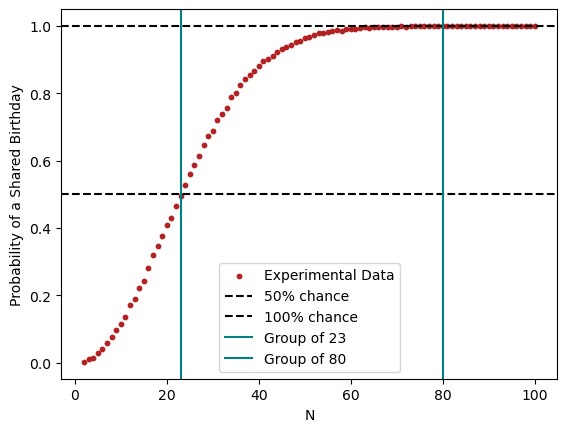

In [23]:
#first create random list of birthdays
def bday_list(N):
    bdays=np.zeros(N)
    for i in range(N):
        bdays[i]=int(365*np.random.random()) # N people can have birthdays between 0 and 365 days
    return bdays

def shared_birthdays(N): # now see how many of these birthdays are shared
    a=bday_list(N) # CREATE A LIST OF BIRTHDAYS
    unique,counts=np.unique(a,return_counts=True) # SEE UNIQUE BIRTHDAYS
    shared_bdays=0 # INITIALISING SHARED BIRTHDAYS
    for i in range(len(counts)): # SEE THE COUNTS OF EACH BIRTHDAY
        if counts[i]==2:
            shared_bdays+=1 # IF SHARED then count it as +1
    return shared_bdays

def P_shared(N,trials):
    success=0 # what we count as success 
    for i in range(trials): # specify trials
        if shared_birthdays(N)>0: # if they are shared 
            success+=1 # count as sucess
    return success/trials # probabilities

#INITIALISING
chosen_group_size=int(input('Size of the Group'))
Number_of_trials=int(input('How many groups should I check? (sample size)'))

#INITIALISING THE FUNCTION
number_of_people=np.arange(2,int(chosen_group_size+1),1)
P_n=np.zeros(len(number_of_people))

# CALCULATING FOR THE EXPERIMENT
trials=Number_of_trials
for i in range(len(number_of_people)):
    P_n[i]=P_shared(number_of_people[i],trials)
    
##NECESSARY PLOTTING    
plt.scatter(number_of_people,P_n,c='firebrick',s=10,label='Experimental Data')
plt.xlabel('N')
plt.axhline(0.5,label='50% chance',ls='--',c='k')
plt.axhline(1,label='100% chance',ls='--',c='k')
plt.axvline(23,label='Group of 23',c='teal')
plt.axvline(80,label='Group of 80',c='teal')
plt.ylabel('Probability of a Shared Birthday')
plt.legend();